In [18]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import matplotlib.pyplot as plt

In [2]:
img_gen = ImageDataGenerator(rotation_range=30,
                            height_shift_range=0.1,width_shift_range=0.1,
                            zoom_range=0.2,horizontal_flip=True,fill_mode='nearest',
                             shear_range=0.2,rescale=1/255,)

In [5]:
train_img = img_gen.flow_from_directory('D:\\Python\\LB ML\\DL\\CNN\Face_Mask\\Train',batch_size=150,class_mode='binary',target_size=(150,150))

Found 10000 images belonging to 2 classes.


In [6]:
test_img = img_gen.flow_from_directory('D:\\Python\\LB ML\\DL\\CNN\Face_Mask\\Test',batch_size=150,class_mode='binary',target_size=(150,150))

Found 992 images belonging to 2 classes.


In [7]:
train_img.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [9]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)            

In [11]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [13]:
result = model.fit(train_img,epochs=10,batch_size=20,verbose=2,
                  validation_data=(test_img))

Epoch 1/10
67/67 - 372s - loss: 0.1308 - accuracy: 0.9513 - val_loss: 0.1904 - val_accuracy: 0.9294
Epoch 2/10
67/67 - 360s - loss: 0.1184 - accuracy: 0.9576 - val_loss: 0.1203 - val_accuracy: 0.9567
Epoch 3/10
67/67 - 357s - loss: 0.1006 - accuracy: 0.9640 - val_loss: 0.0878 - val_accuracy: 0.9748
Epoch 4/10
67/67 - 353s - loss: 0.0888 - accuracy: 0.9684 - val_loss: 0.0837 - val_accuracy: 0.9688
Epoch 5/10
67/67 - 354s - loss: 0.0756 - accuracy: 0.9723 - val_loss: 0.0806 - val_accuracy: 0.9698
Epoch 6/10
67/67 - 363s - loss: 0.0671 - accuracy: 0.9752 - val_loss: 0.0821 - val_accuracy: 0.9667
Epoch 7/10
67/67 - 374s - loss: 0.0548 - accuracy: 0.9799 - val_loss: 0.0957 - val_accuracy: 0.9688
Epoch 8/10
67/67 - 344s - loss: 0.0588 - accuracy: 0.9770 - val_loss: 0.0452 - val_accuracy: 0.9859
Epoch 9/10
67/67 - 336s - loss: 0.0548 - accuracy: 0.9807 - val_loss: 0.0539 - val_accuracy: 0.9778
Epoch 10/10
67/67 - 338s - loss: 0.0492 - accuracy: 0.9827 - val_loss: 0.0401 - val_accuracy: 0.9829

In [14]:
model.save('Face_Mask.h5')

In [15]:
test_img.class_indices

{'WithMask': 0, 'WithoutMask': 1}

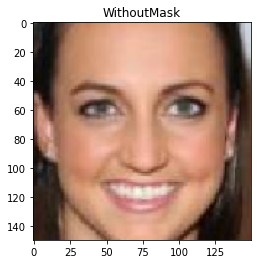

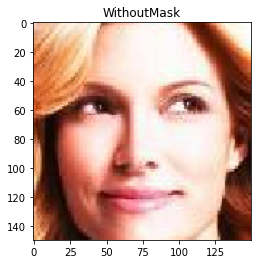

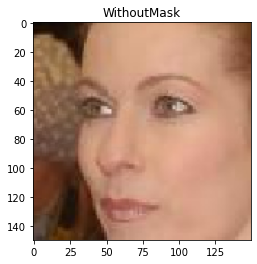

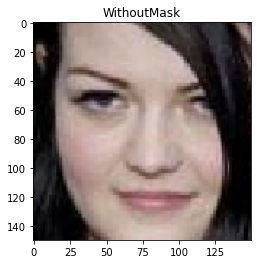

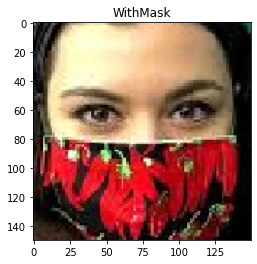

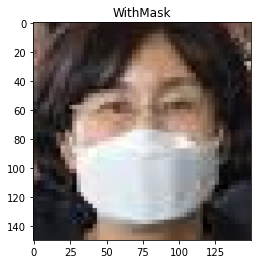

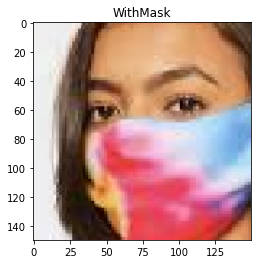

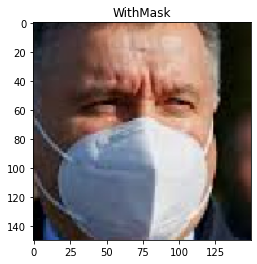

In [34]:
rev = dict((v,k) for k,v in test_img.class_indices.items())
for i in (2,6,40,151,357,627,964,1002):
    img = load_img(f'D:\\Python\\LB ML\\DL\\CNN\\Face_Mask\\{i}.png',target_size=(150,150))
    img_ar = img_to_array(img)
    img_re = img_ar.reshape(1,150,150,3)
    pred = model.predict_classes(img_re)
    plt.imshow(img)
    plt.title(rev[pred[0][0]])
    plt.show()